In [20]:
import pandas as pd
from rl_mdp.util import *
from rl_mdp.model_free_prediction.monte_carlo_evaluator import * 
from rl_mdp.model_free_prediction.td_lambda_evaluator import * 
from rl_mdp.model_free_prediction.td_evaluator import *
from tqdm.notebook import tqdm

In [2]:
mdp = create_mdp()

In [3]:
p1 = create_policy_1()
p2 = create_policy_2()

In [4]:
mc = MCEvaluator(env=mdp)
td = TDEvaluator(env=mdp, alpha=0.1)
tdl = TDLambdaEvaluator(env=mdp, alpha=0.1, lambd=0.5)

In [5]:
n = 1000
n_ep = 1000
# Call the evaluate function n times for each (algorithm, policy)-pair
y = lambda f, n: [np.array(_) for _ in zip(*[f() for _ in tqdm(range(n), total=n)])]
m1 = y(f=lambda : mc.evaluate(p1, n_ep), n=n) # (V(s), ep_r, ep_l)
m2 = y(f=lambda : mc.evaluate(p2, n_ep), n=n) # (V(s), ep_r, ep_l)
t1 = y(f=lambda : td.evaluate(p1, n_ep), n=n) # (V(s), ep_r, ep_l)
t2 = y(f=lambda : td.evaluate(p2, n_ep), n=n) # (V(s), ep_r, ep_l)
tl1 = y(f=lambda : tdl.evaluate(p1, n_ep), n=n) # (V(s), ep_r, ep_l)
tl2 = y(f=lambda : tdl.evaluate(p2, n_ep), n=n) # (V(s), ep_r, ep_l)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Monte Carlo

Text(0.5, 1.0, 'Policy-$(\\pi_2)$')

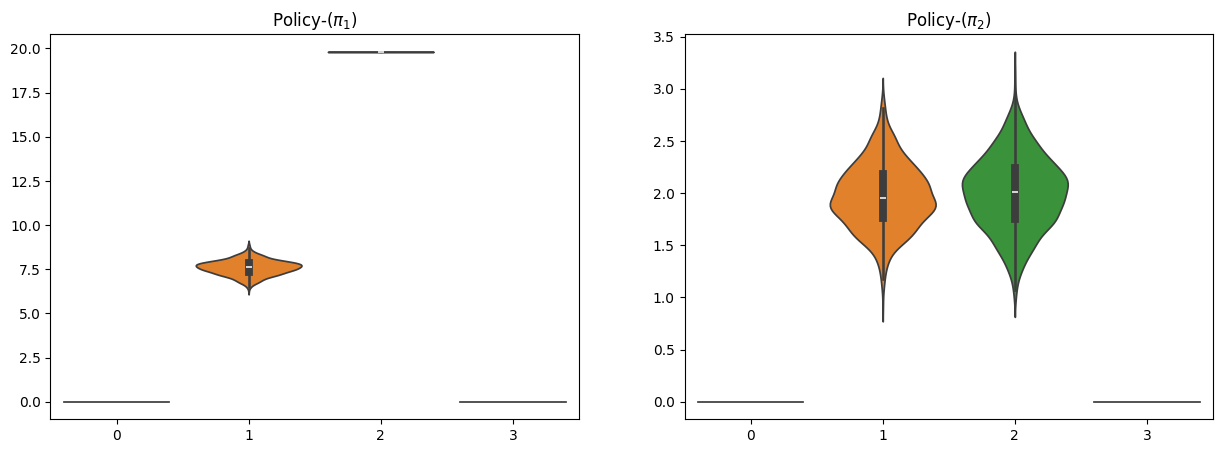

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(m1[0])
plt.title(r"Policy-$(\pi_1)$")
plt.subplot(1, 2, 2)
sns.violinplot(m2[0])
plt.title(r"Policy-$(\pi_2)$")

In [21]:
average = zip(t1[0].mean(0), t2[0].mean(0))
t_df = pd.DataFrame(average, columns=['P1', 'P2'])
t_df

,P1,P2
0,1.768691,0.551201
1,1.788579,0.646924
2,2.000000,0.590409
3,0.000000,0.000000


# TD(0)

Text(0.5, 1.0, 'Policy-$(\\pi_2)$')

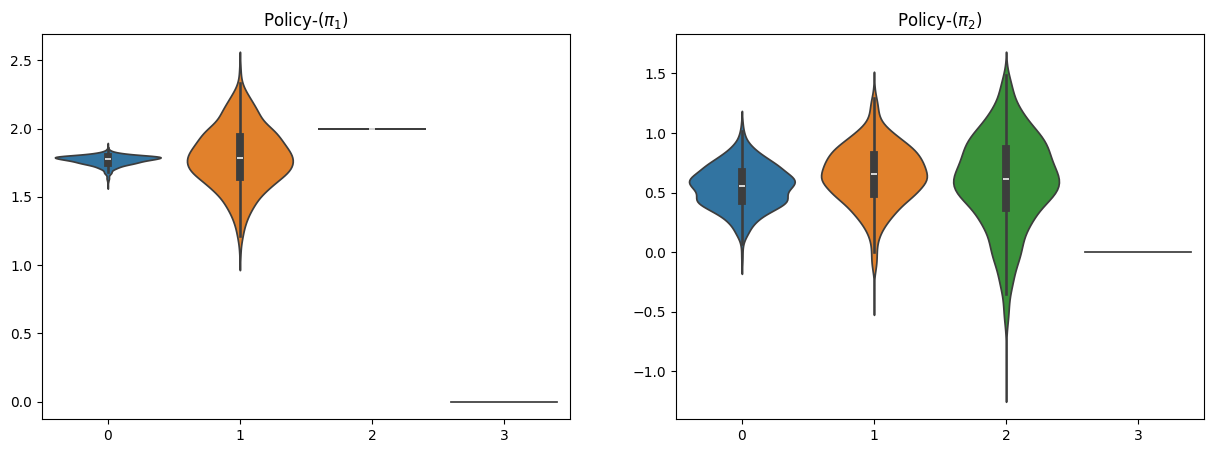

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(t1[0])
plt.title(r"Policy-$(\pi_1)$")
plt.subplot(1, 2, 2)
sns.violinplot(t2[0])
plt.title(r"Policy-$(\pi_2)$")

In [22]:
average = zip(t1[0].mean(0), t2[0].mean(0))
t_df = pd.DataFrame(average, columns=['P1', 'P2'])
t_df

,P1,P2
0,1.768691,0.551201
1,1.788579,0.646924
2,2.000000,0.590409
3,0.000000,0.000000


# TD(0.4)

Text(0.5, 1.0, 'Policy-$(\\pi_2)$')

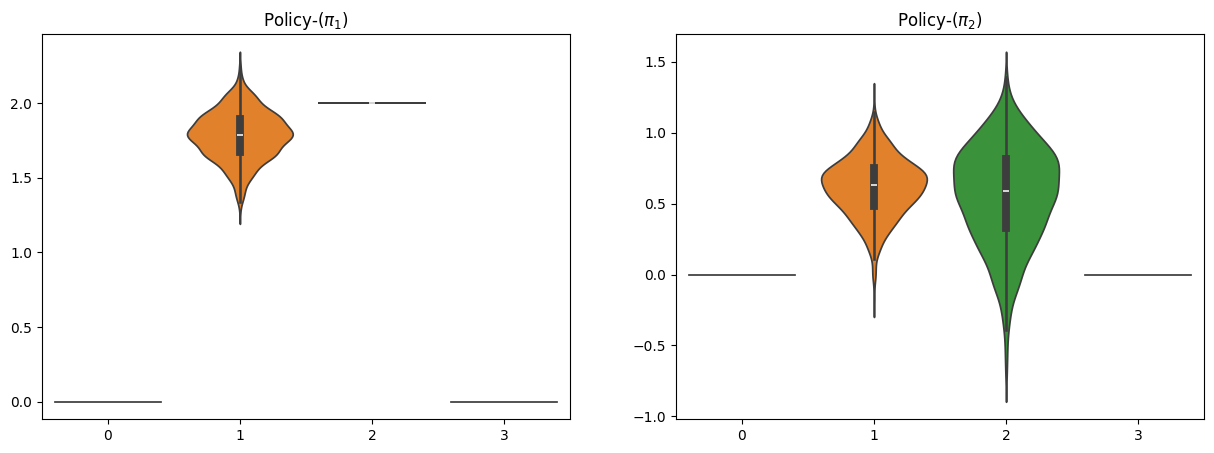

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(tl1[0])
plt.title(r"Policy-$(\pi_1)$")
plt.subplot(1, 2, 2)
sns.violinplot(tl2[0])
plt.title(r"Policy-$(\pi_2)$")

In [18]:
average = zip(tl1[0].mean(0), tl2[0].mean(0))
tl_df = pd.DataFrame(average, columns=['P1', 'P2'])
tl_df

,P1,P2
0,0.000000,0.000000
1,1.782875,0.617620
2,2.000000,0.557039
3,0.000000,0.000000


In [12]:
mc.returns.keys()

dict_keys([0, np.int64(2), np.int64(1)])

In [19]:
np.array([(float(_.std()), float(_.mean()), sum(_)) for _ in [np.array(mc.returns[_]) for _ in range(3)]])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.16355829e+00, 1.65183752e+00, 1.42553578e+03],
       [3.48085066e+00, 1.72182637e+00, 3.24392088e+03]])